In [1]:
!git clone https://github.com/NSCC-COGS/GDAA2030.git

Cloning into 'GDAA2030'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 242 (delta 10), reused 0 (delta 0), pack-reused 214
Receiving objects: 100% (242/242), 13.08 MiB | 31.45 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [2]:
% pip install tifffile
%cd /content/GDAA2030/tutorial2/jordankempff

     |████████████████████████████████| 133kB 3.3MB/s 
     |████████████████████████████████| 18.1MB 1.3MB/s 
/content/GDAA2030/tutorial2/jordankempff


                                  productId  ...                                       download_url
0  LC08_L1TP_149039_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
1  LC08_L1TP_012001_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
2  LC08_L1TP_012002_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
3  LC08_L1TP_012010_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
4  LC08_L1TP_012011_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...

[5 rows x 12 columns]
0         2017-04-11 05:36:29.349932
1         2017-04-11 15:14:40.001201
2         2017-04-11 15:15:03.871058
3         2017-04-11 15:18:14.918879
4         2017-04-11 15:18:38.780265
                     ...            
1940196   2020-04-21 08:31:36.476580
1940197   2020-04-21 08:32:24.220535
1940198   2020-04-21 08:33:11.960254
1940199   2020-04-21 07:10:38.500595
1940200

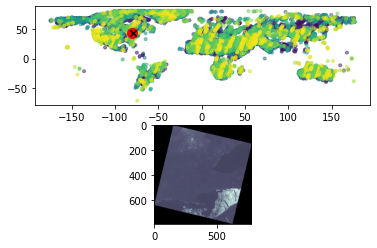

In [3]:
################################
# GDAA2030_T2_JordanKempff.py
# Jordan Kempff
# February 25, 2020
################################

import GDAA2030_T2_functions_JordanKempff as glf 
''' for this code wer will allow an input coordinate and search for the closest, nearest landsat 8 
scene for a given band based on a scene list
we will also filter by cloud cover percentage.'''

# specify the scene location and variables
lat = 43.33
lon = -79.80
band = 1
cloudCoverMax = 2
# sceneList = "scene_list.txt"
sceneList = 'https://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz'
sceneTest = None
imageDir = r'.\images'

# load the list of scenes
sceneDf = glf.loadSceneList(sceneList, sceneTest, cloudCoverMax)

path,row = glf.findPathRow(sceneDf, lat, lon)

# show the selected scene number
selectedScene = glf.selectScene(sceneDf, path, row)
print(selectedScene)

imageUrl, imagePath = glf.getImageIO(selectedScene, band, imageDir)

# download the selected scene
glf.downloadImage(imageUrl, imagePath)

# Plot the results of the scene as well as the location of all scenes
glf.plotResults(lat,lon, selectedScene,sceneDf,imagePath)